# Ripasso algoritmi sui grafi

### Settare il path (solo per jupyter notebook)
Per farlo, siccome ci troviamo in un notebook python, dobbiamo aggiungere il path del punto in cui ci troviamo nella lista di path.

> ⚠️ Se non dovesse funzionare, prova a commentare il seguente blocco di codice

In [1]:
import os
import sys

sys.path.insert(0, os.getcwd())

### Importare le librerie
In questo caso ci serve l'accesso a 3 file, quello per la classe `Graph`, quello per gli algoritmi e quello per poter visualizzare i risultati degli algoritmi.

In [2]:
from glib.graph     import Graph
from glib.draw      import *
from glib.algorithm import *

### Creare un grafo
Per la creazione di un grafo, la procedura e' molto semplice...

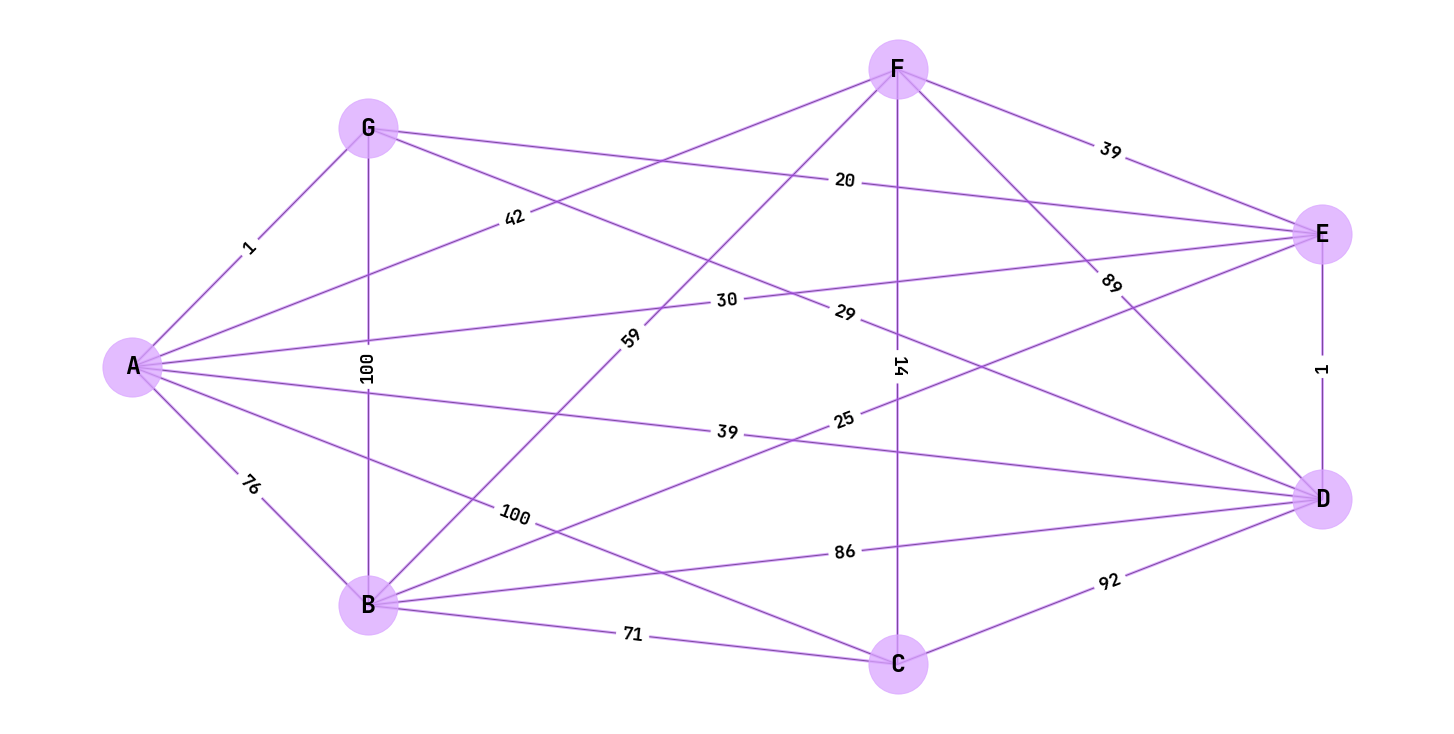

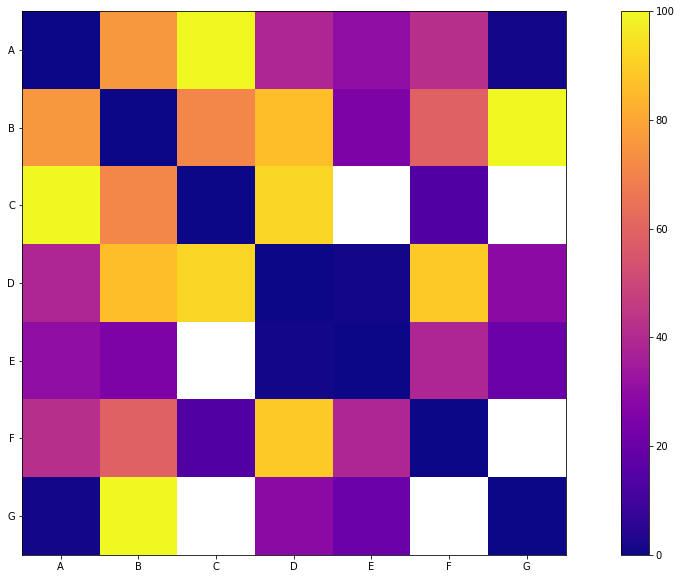

In [3]:
G = Graph(directed=False) # Crea un grafo vuoto non orientato

G.add_nodes(['A', 'B', 'C', 'D', 'E', 'F', 'G']) # Aggiunge i nodi
G.add_edge('A', 'B', 1) # Aggiunge un arco
G.parse_edge('G A 4') # Aggiunge un arco, ma traduce i nodi e il peso da una singola stringa
G.parse_edges(['A B 1', 'B C 2', 'C D 3', 'D E 4', 'E F 5', 'F G 6', 'C G 3']) # Aggiunge una lista di archi, traducendo i nodi e il peso da una stringa

# Se si vuole creare un grafo randomico...
G = Graph.createRandomGraph(['A', 'B', 'C', 'D', 'E', 'F', 'G'], directed=False, no_self_edges=True)
# no_self_edges = True per evitare archi che ci siano archi che partano da un nodo e arrivano a quello stesso

# Proviamo a disegnare il grafo
draw(G)

# Ora disegniamo la matrice di adiacenza
draw_adj_matrix(G)

Possiamo notare che nella rappresentazione della matrice di adiacenza, le celle che hanno uno sfondo completamente bianco rappresentano i nodi che fra loro non hanno una connessione,
quindi il peso della connessione e' $+\infty$.

Mentre le celle nella diagonale principale hanno valore 0, infatti la distanza fra un nodo e se stesso e' esattamente 0, a meno che non si inseriscano connessioni con peso differente da 0.
Per farlo tuttavia e' necessario che il flag `no_self_edges` sia settato a `False`.

## Algoritmi di ricerca di un MST (Minimum Spanning Tree)

### 1. Algoritmo di Kruskal

L'algoritmo di kruskal e' un algoritmo di ricerca di un MST (Minimum Spanning Tree) che prende in input un grafo e restituisce nuovo grafo (MST), dove le connessioni sono tutte di peso minimo e dove non sono presenti cicli.

Per farlo si usa la lista di archi, opportunamente ordinata in maniera non decrescente, estraendo un arco per volta e provando ad inserirlo nel risultato finale, in modo da non generare cicli.

Lo pseudocodice e' il seguente:

$$
\begin{array}{lcl}
  \tt Kruskal(G) \\\\
  \tt\quad F := \emptyset \\ \\
  \tt\quad for \ each\  v \in G.V \ do \\
    \tt\quad \quad MAKE\_SET(v) \\ \\

  \tt\quad for\ each\  (u, v) \in G.E \ do \\
    \tt\quad \quad if \ FIND\_SET(u) \neq FIND\_SET(v) \ then \\
        \tt\quad \quad\quad INSERT(u, v) \in F \\
        \tt\quad \quad\quad UNION(FIND\_SET(u), FIND\_SET(v)) \\ \\ 
\end{array}
$$

#### Dimostrazione

La correttezza dell'algoritmo di Kruskal e' verificata per il teorema fondamentale dei MST, infatti man mano che cresce sara' una `foresta`, ovvero un insieme di componenti connesse
che sono a loro volta degli alberi.

Quando si aggiunge un arco di peso minimo, si aggiunge un `arco leggero` che attraversa il taglio nel grafo.

#### Esempio di utilizzo con la libreria

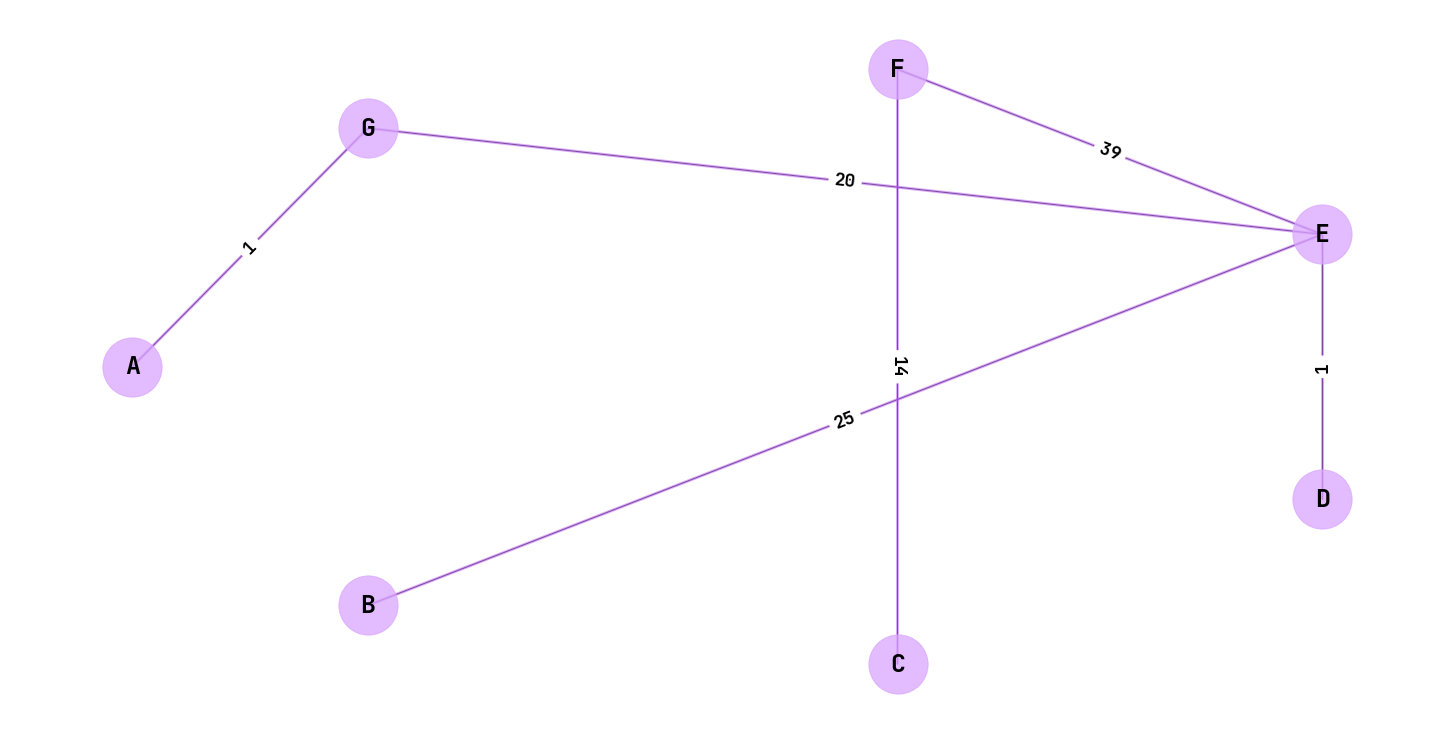

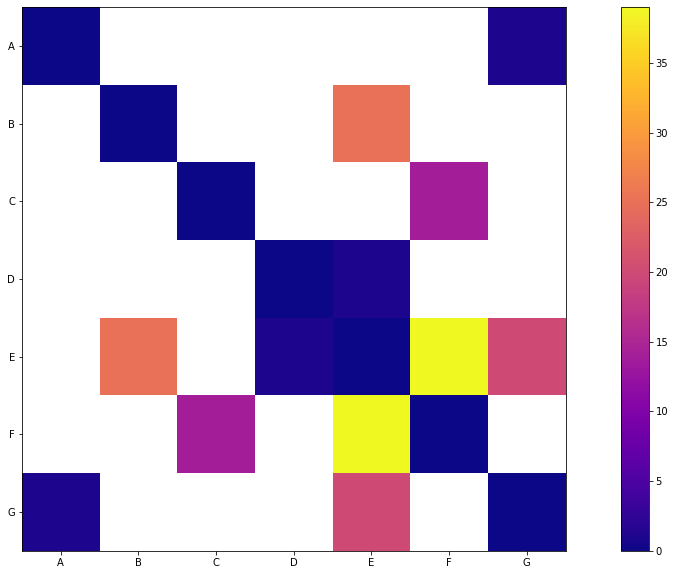

In [4]:
MST = kruskal(G) # Calcola il MST di G, tramite l'algoritmo di Kruskal

draw(MST)
draw_adj_matrix(MST)

### 2. Algoritmo di Prim

L'algoritmo di prim e' un algoritmo di ricerca di un MST (Minimum Spanning Tree) che prende in input un grafo e restituisce nuovo grafo (MST), dove le connessioni sono tutte di peso minimo e dove non sono presenti cicli.

Per farlo si inizia da un nodo casuale... da esso si crea un taglio, dal quale si procede scegliendo l'arco con peso minore. Il taglio successivo comprendera' da una parte i nodi gia' visitati, mentre dall'altra parte i nodi non ancora visitati.

Per implementarlo si puo' usare una coda con priorita', per poter estrarre il nodo da aggiungere al taglio.

$$
\begin{array}{lcl}
  \tt Prim(G, W, r) \\\\
  \tt\quad Q \leftarrow V[G] \\ \\
  \tt\quad for \ each\ u \in Q \ do \\
  \tt\quad\quad key[u] = +\infty \\
  \tt\quad\quad \pi[u] = \frak{NIL} \\\\

  \tt\quad key[r] = 0 \\\\

  \tt\quad while \ Q \neq \emptyset \ do \\
  \tt\quad\quad u \leftarrow EXTRACT\_MIN(Q) \\

  \tt\quad\quad for \ each\ v \in G.Adj[u] \ do \\\\

  \tt\quad\quad if \ v \in \ Q \ \wedge \ W(u, v) < key[v] \ then \\
  \tt\quad\quad\quad \pi[v] := u \\
  \tt\quad\quad\quad key[v] := W(u, v) \\\\

  
  \tt\quad return \ A = \ \{ (u, \pi [u]) \in E[G] \ | \ u \in V[G] \setminus \{r\} \}
\end{array}
$$

#### Dimostrazione
La dimostrazione dell'algoritmo di Prim e' verificata per il teorema fondamentale dei MST.

#### Esempio di utilizzo con la libreria

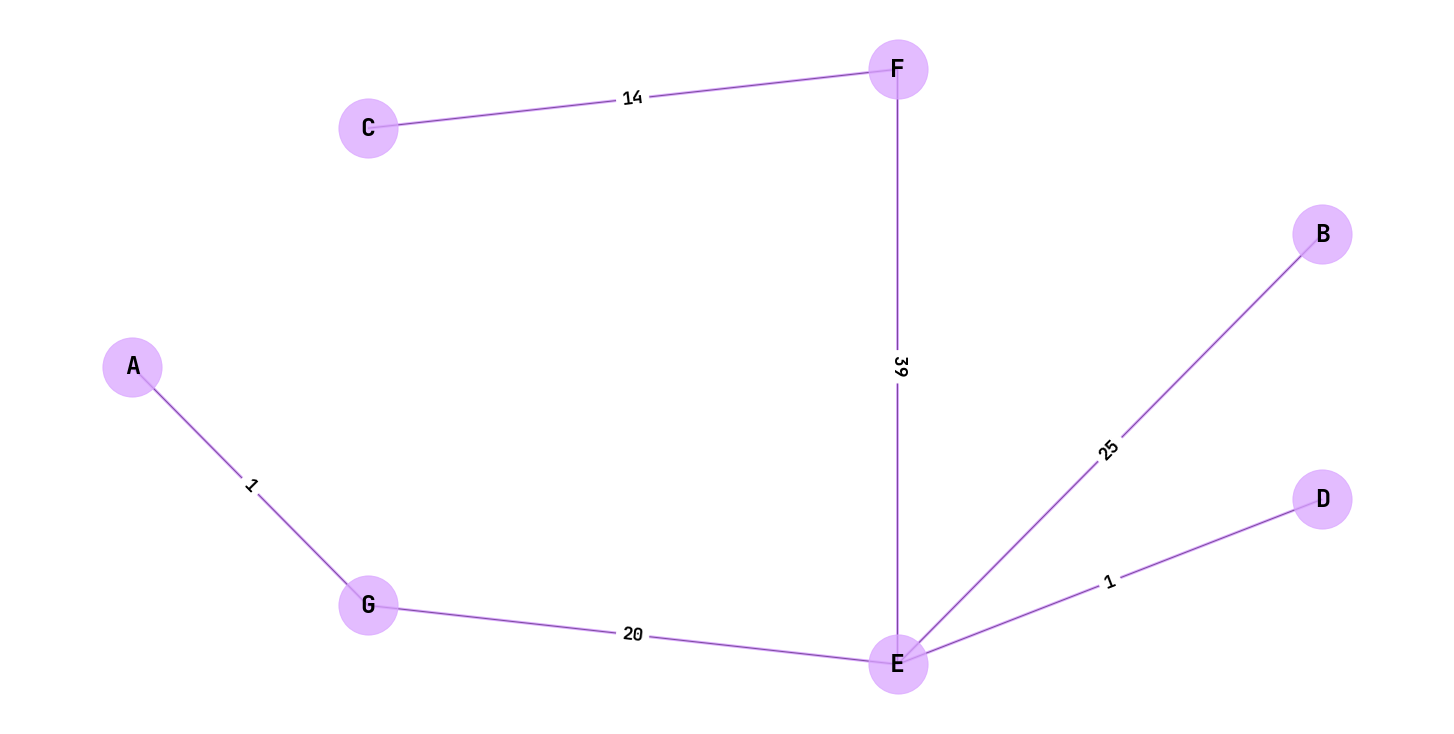

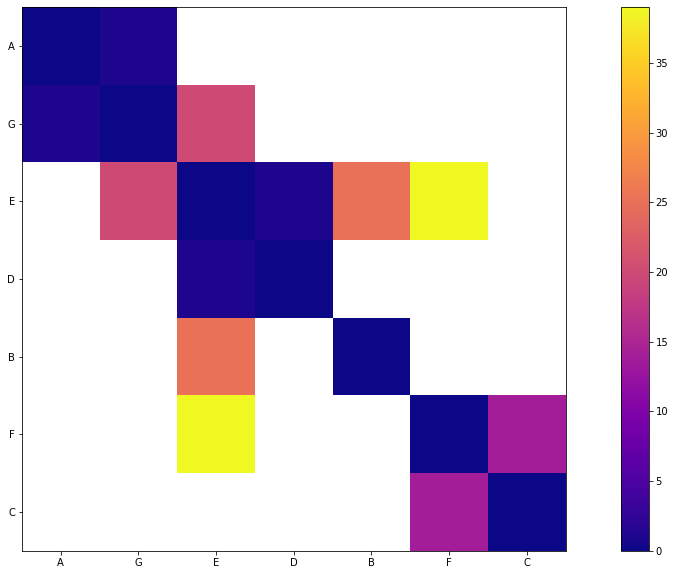

In [5]:
MST = prim(G) # Calcola il MST di G, tramite l'algoritmo di Prim

draw(MST)
draw_adj_matrix(MST)

## Algoritmi di ricerca di percorsi minimi

### 1. Algoritmo di Dijkstra

$$
\begin{array}{lcl}
\tt Djkstra(G, s) \\\\
\tt\quad INIT\_SS(G, s) \\
\tt\quad Q \leftarrow V[G] \\
\tt\quad S \leftarrow \emptyset \\\\

\tt\quad while \ Q \neq \emptyset \ do \\
\tt\quad\quad u \leftarrow EXTRACT\_MIN(Q) \\
\tt\quad\quad S \leftarrow S \cup \{ u \} \\\\

\tt\quad\quad for \ each\ v \in G.Adj[u] \ do \\
\tt\quad\quad\quad RELAX(u, v, W(u, v)) \\\\

\tt\quad return \ (d, G_\pi)
\end{array}
$$

#### Dimostrazione (per assurdo)
Supponiamo che al termine dell'algoritmo $\exist u\in V : d[u] \neq \delta(s, u)$ e che $u$ e' il primo nodo per qui accade.

##### Osservazioni
1. $s \neq u$
2. Insieme di vertici estratti $\neq \emptyset$
3. Nel taglio si possono avere 2 casi:
    - $\delta(s, v) = +\infty$, ovvero non esiste il cammino minimo
    - $\delta(s, v) \in \mathbb{R}$, ovvero esiste il cammino minimo
4. $d[r] = \delta(s, r)$
5. $d[y] = \delta(s, r) + w(x, y)$
6. $d[u] \leqslant d[y]$ (infatti stiamo per estrarre $u$, non $y$)
7. $\delta(s, u) \geqslant d[u]$
8. $d[u] \leqslant d[v]$

##### Ricostruzione dell'assurdo
Da $\delta(s, u) \leqslant d[u]$ si puo' ricavare $d[u] = d[v]$, che e' evidentemente una contraddizione dell'assurdo dell'ipotesi iniziale.

#### Esempio di utilizzo con la libreria

In [6]:
first_node = G.nodes[0]

# Calcola il percorso minimo dal primo nodo del grafo a tutti gli altri nodi
D, P = dijkstra(G, first_node)

print(' >>> Dizionario delle distanze da',first_node ,'ad ogni altro nodo ...', D)
print(' >>> Dizionario dei predecessori di ogni nodo ............', P)

 >>> Dizionario delle distanze da A ad ogni altro nodo ... {'A': 0, 'B': 46, 'C': 56, 'D': 22, 'E': 21, 'F': 42, 'G': 1}
 >>> Dizionario dei predecessori di ogni nodo ............ {'A': None, 'B': 'E', 'C': 'F', 'D': 'E', 'E': 'G', 'F': 'A', 'G': 'A'}


### 2. Algoritmo di Bellman-Ford

$$
\begin{array}{lcl}
  \tt Bellman\_Ford(G, s) \\\\

  \tt\quad INIT\_SS(G, s) \\\\

  \tt\quad for \ i=1 \to |V[G]| - 1 \ do \\
  \tt\quad\quad for \ each\ (u, v) \in E[G] \ do \\
  \tt\quad\quad\quad RELAX(u, v, w(u, v)) \\\\

  \tt\quad for \ each\ (u, v) \in E[G] \ do \\
  \tt\quad\quad\quad if \ d[v] > d[u] + w(u, v) \ then \\
  \tt\quad\quad\quad\quad return \ (false, d, G_\pi) \\\\

  \tt\quad return \ (true, d, G_\pi)
\end{array}
$$

Dove nel primo ciclo for, si lancia una $RELAX$ per ogni arco tante volte quanto il numero di nodi. Mentre nel secondo ciclo for si cerca di capire se esistono cicli negativi.
Se ce ne fossero, allora la soluzione restituita potrebbe essere non affidabile.

#### Dimostrazione (caso 1, senza cicli negativi)

Alla fine dell'algoritmo si ha:
1. $d[u] = \delta(s, u) \forall u \in V[G]$
2. $G_\pi$ e' un albero di cammini minimi
3. L'algoritmo restituisce $True$

Per ogni $u \in V[G]$ si ha:
$$
\delta(s, u) = \begin{cases}
  +\infty & \text{Ovvio, per proprieta' di assenza di cammino} \\
  l \in \mathbb{R} \\
  -\infty & \text{Non possibile, si assume non ci siano cicli negativi}
\end{cases}
$$

Nel caso $\delta(s, u) \in \mathbb{R}$, ovvero che esiste almeno un cammino fra $s$ e $u$, allora esiste anche un cammino minimo che e' semplice (per ipotesi non ci sono cammini minimi)

Non e' detto che un cammino minimo debba per forza essere semplice, tuttavia nell'insieme di cammini minimi ne esiste almeno 1 semplice, si puo' infatti rimuovere un ciclo da un cammino non semplice.

Di conseguenza, per la proprieta' triangolare, si ha:
$$ \forall (u, v) \in E[G] : d[v] \leqslant d[u] + w(u, v) $$
Ovvero
$$ \neg (\exists (u, v) \in E[G] : d[v] > d[u] + w(u, v)) $$
Pertanto
$$ \begin{array}{rcl}
  \delta(s, v) & \leqslant & \delta(s, u) + w(u, v) \\
  d[v] & \leqslant & d[u] + w(u, v)
\end{array}$$

#### Dimostrazione (caso 2, esiste almeno un ciclo negativo)
> Dimostrazione per assurdo

$$ \forall (u, v) \in E[G] : d[v] \leqslant d[u] + w(u, v) $$

##### Ipotesi 1: Esiste un ciclo negativo raggiungibile da $s$ a $c$
$c = \left< {x_0, ..., x_q} \right>$ raggiungibile da $s$, dove $x_0 = x_q$ e...
$$ \sum^q_{i=1} w(x_{i-1}, x_i) < 0$$

##### Ipotesi 2: L'algoritmo restituisce $True$
$$
\forall (u, v) \in E[G] : d[v] \leqslant d[u] + w(u, v)
$$
Varra' anche sugli archi $\in c$, ovvero che
$$ \forall i=1,...,q : d[x_i] \leqslant d[x_{i-1}] + w(x_{i-1}, x_i) $$

Quindi e' possibile sommare entrambi i membri, senza pero' cambiare il valore della diseguaglianza.

$$
\begin{array}{rcl}
  \sum^q_{i=1} d[x_i]  & \leqslant &  \sum^q_{i=1} d[x_{i-1}] + \sum^q_{i=1} w(x_{i-1}, x_i) \\
  0 & \leqslant & \sum^q_{i=1} w(x_{i-1}, x_i)
\end{array}
$$

Il che si dimostra essere un assurdo, in quanto la somma dei pesi e' $\geqslant 0$ invece di essere $< 0$, come per un ciclo negativo, invalidando quindi la seconda ipotesi.


#### Esempio di utilizzo con la libreria

In [7]:
Res, D, P = bellman_ford(G, first_node)

print(' >>> Il risultato e\' affidabile? .........................', Res)
print(' >>> Dizionario delle distanze da',first_node ,'ad ogni altro nodo ...', D)
print(' >>> Dizionario dei predecessori di ogni nodo ............', P)

 >>> Il risultato e' affidabile? ......................... True
 >>> Dizionario delle distanze da A ad ogni altro nodo ... {'A': 0, 'B': 46, 'C': 56, 'D': 22, 'E': 21, 'F': 42, 'G': 1}
 >>> Dizionario dei predecessori di ogni nodo ............ {'A': None, 'B': 'E', 'C': 'F', 'D': 'E', 'E': 'G', 'F': 'A', 'G': 'A'}


### 3. Algoritmo di Floyd-Warshall

$$
\begin{array}{lcl}
  \tt Floyd\_Warshall(W) \\\\

  \tt\quad n \leftarrow rows(W) \\
  \tt\quad D^{(0)} \leftarrow W \\\\

  \tt\quad for \ k=1 \to n \ do \\
  \tt\quad\quad for \ i=1 \to n \ do \\
  \tt\quad\quad\quad for \ j=1 \to n \ do \\
  \tt\quad\quad\quad\quad d_{ij}^{(k)} = min(d_{ij}^{(k-1)}, d_{ik}^{(k-1)} + d_{kj}^{(k-1)}) \\\\

  \tt\quad return \ D^{(n)}
\end{array}
$$

#### Proprieta'

##### 1. Se non ci sono cicli negativi, la diagonale principale (per costruzione) rimane con ogni valore sempre uguale a 0
Dato che $d_{ii}^{(k)} = \min(d_{ij}^{(k-1)}, d_{ik}^{(k-1)} + d_{kj}^{(k-1)})$, assumiamo vera la proprieta' fino a $k-1$ e dimostriamo per $k$.

$d_{ik}^{(k-1)} + d_{ki}^{(k-1)} \geqslant 0$ e $d_{ii}^{(k-1)} = 0$ per ipotesi induttiva.

Se invece $d_{ik}^{(k-1)} + d_{ki}^{(k-1)} < 0$, violerebbe l'assunzione iniziale, ovvero l'assenza di cicli negativi.

##### 2. Al passo $k$ la `k-esima` riga e colonna rimangono invariate
Quando si genera la matrice `k-esima`, al passo `k-esimo` sia la riga che la colonna in posizione `k` rimangono invariate.

$$
\begin{array}{rcl}
  d_{ik}^{(k)} &=& d_{ik}^{(k-1)} \\
  ... &=& \min(d_{ik}^{(k-1)}, d_{ik}^{(k-1)} + d_{kk}^{(k-1)}) \\
  ... &=& \min(d_{ik}^{(k-1)}, d_{ik}^{(k-1)}) \\
  ... &=& d_{ik}^{(k-1)}
\end{array}
$$

Dato che nell'osservazione (1) si ha che nella diagonale principale ogni cella ha valore 0, allora si puo' rimuovere $d_{kk}^{(k-1)}$.

#### Esempio di utilizzo con la libreria

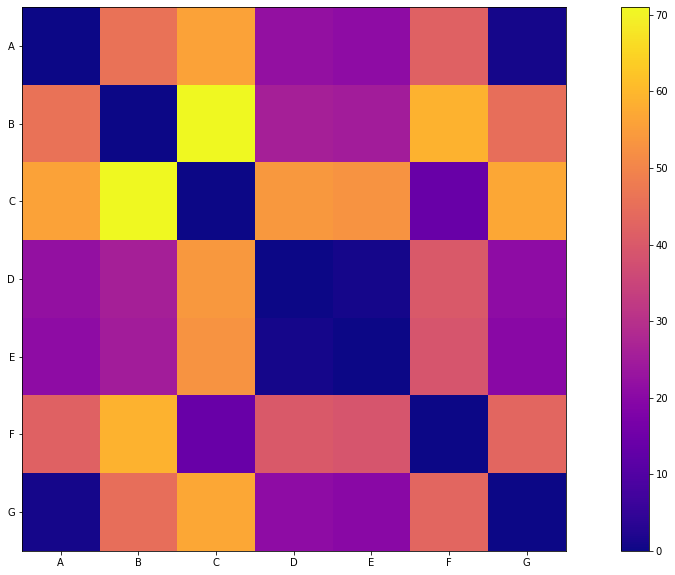

[[0, 46, 56, 22, 21, 42, 1], [46, 0, 71, 26, 25, 59, 45], [56, 71, 0, 54, 53, 14, 57], [22, 26, 54, 0, 1, 40, 21], [21, 25, 53, 1, 0, 39, 20], [42, 59, 14, 40, 39, 0, 43], [1, 45, 57, 21, 20, 43, 0]]


In [8]:
M = floyd_warshall(G) # Calcola la matrice di Floyd-Warshall
draw_matrix(M, G)     # NOTA: Questa non e' una matrice di adiacenza, bensi' per ogni riga indica il percorso minimo da un nodo a tutti gli altri
print(M)              # Stampo anche i valori, cosi' da poter vedere nel dettaglio la lunghezza di ogni percorso minimo